In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
#read in data file and skip to data
file=open("/Users/Roslyn/Desktop/run-XXXII", "r")

In [3]:
with file as f:
    lines_after_6 = f.readlines()[7:]

In [4]:
#extract first two columns and convert to float
col1=[]
for x in lines_after_6:
    col1.append(float(x.split()[0]))
        
col2=[]
for x in lines_after_6:
    col2.append(float(x.split()[1]))
    
#combine real and imaginary parts to give list of complex data outputs
data=np.vectorize(complex)(col1, col2)

In [5]:
print(len(data))
data10000000=data[:10000000]
print(len(data10000000))

24089000
10000000


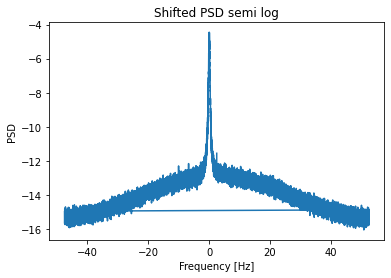

In [6]:
#Find and plot PSD 
fall, Pxx_all = signal.welch(data10000000-np.mean(data10000000), 100, nperseg=(10000000/256), return_onesided=False, detrend=None, scaling='density', window='hanning')
#plt.semilogy(fall, Pxx_all)
#plt.title('PSD using Welchs Method')
#plt.xlabel('frequency')
#plt.ylabel('PSD')
#plt.show()

#shift the peak to zero before putting into calibration eqs
maxindex=np.argmax(Pxx_all)
shift=fall[maxindex]
fallshift=fall+abs(shift)

#plt.semilogy(fallshift, Pxx_all)
plt.plot(fallshift,10*np.log10(Pxx_all))
#plt.xscale("log")
plt.title('Shifted PSD semi log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

-49.99999999999999


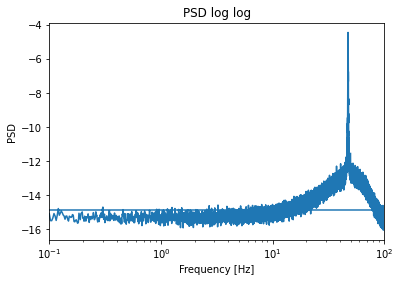

In [7]:
#showing log log plot, adding minimum freq to axis to prevent negative values in x 
print(np.min(fall))
fplus=[x+abs(np.min(fall)) for x in fall]

plt.plot(fplus,10*np.log10(Pxx_all))
plt.xscale("log")
plt.xlim(0.1, 100)
plt.title('PSD log log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.show()

#appears smoother but peak now looks like outliers?

In [8]:
print(np.max(Pxx_all))
print(np.argmax(Pxx_all))
print(np.max(10*np.log10(Pxx_all)))

0.3587904913158846
38094
-4.451590751702032


In [9]:
#displacement noise equation from GW Summary 
#Su(omega) =(1/k i omega)^2 * 1/Z^2 * Sv(omega)
#omega=2pi f

#SQUID transimpedance 
Zsquid= 1.2e6

#spectral density of voltage noise output by SQUID - convert Sv(f) to Sv(omega)=Sv here
#hasn't been done in SS try without
Sv= Pxx_all

#electromechanical coupling constant (from Will's code kappa1)
ksquared= (0.000576417)**2

#omega frequency axis, add mode freq 1 and convert from Hz to rad/s, and create squared axis 
omega= [(x+4.993017E6)*(2*np.pi) for x in fallshift]
omegasq= [x**2 for x in omega]

#multiply 1/omega^2 list and Sv 
product= [(1/a) * b for a, b in zip(omegasq, Sv)]
 
#put into equation for Su(omega)
#note: 1/i^2 makes constants negative but haven't entered this here
#10^-6 squared is a conversion from micro V to V
constants = (1/ksquared)*(1/(Zsquid**2)*(10**(-6))**2)
Su = [x*(constants) for x in product]

Text(0, 0.5, 'Su')

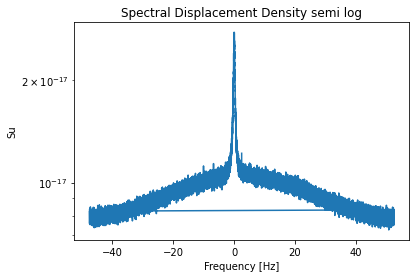

In [10]:
#plot

plt.semilogy(fallshift, np.sqrt(Su))
plt.title('Shifted Spectral Displacement Density semi log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Su')

Text(0.5, 1.0, 'Spectral Displacement Density log log')

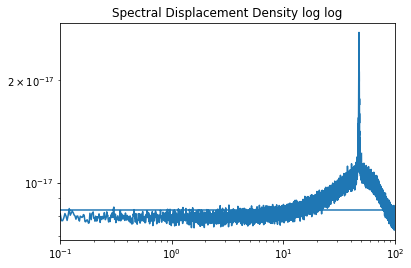

In [11]:
plt.plot(fplus, np.sqrt(Su))
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,100)
#plt.ylim(10**-18,10**-15)
plt.title('Spectral Displacement Density log log')

#plotting log log again looks smoother but with large peak 

Text(0.5, 1.0, 'Spectral Displacement Density log log')

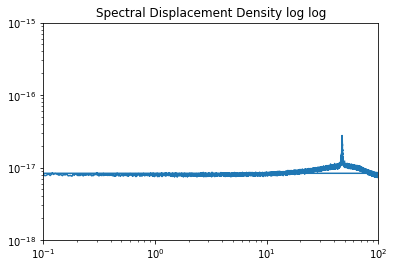

In [12]:
plt.plot(fplus, np.sqrt(Su))
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,100)
plt.ylim(10**-18,10**-15)
plt.title('Spectral Displacement Density log log')

#using same x axis limits as in Will's this peak is small 